# HW Day #6 Wine 분류
 - Wine의 특징을 설명하는 변수들을 이용하여 red or white wine인지 예측

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### 파일 읽기
 - wine_red.csv을 읽어서 red_wine에 저장한 후 상위 5개를 출력하세요.
 - wine_white.csv을 읽어서 white_wine 저장한 후 상위 5개를 출력하세요.
 - 이 데이터는 쉼표(',')가 아닌 세미콜론(';')으로 데이터를 구분하고 있기 때문에 sep=';' 을 적용해야 합니다.

In [2]:
# code here
red_wine=pd.read_csv('wine_red.csv',sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
# code here
white_wine=pd.read_csv('wine_white.csv',sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### 데이터 확인
 - red_wine과 white_wine의 정보를 조회하세요

In [4]:
# code here
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  type                  1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
# code here
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


### 데이터 병합
 - red_wine과 white_wine의 열 label을 출력하세요.
 - red_wine과 white_wine을 상하로 결합하여 wine에 저장하세요. 결합 시 중복 인덱스가 발생하지 않도록 인덱스를 무시해주세요
 - 병합된 wine 데이터프레임의 열 label을 앞에서부터 순서대로 다음과 같이 변경하세요.
   - '산도', '향', '신선함', '단 맛', '짠 맛', '황 화합물1', '황 화합물2',
     '무게감', '신 맛', '황 화합물3', '알코올', '품질', '유형'

In [6]:
# code here
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [7]:
# code here
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [6]:
# code here
wine = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [7]:
# code here
wine.columns=['산도', '향', '신선함', '단 맛', '짠 맛', '황 화합물1', '황 화합물2','무게감', '신 맛', '황 화합물3', '알코올', '품질', '유형']
wine

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질,유형
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### 데이터 분석

 - 유형을 제외한 나머지 변수의 분포 확인 (histogram)
 - sns.histplot 사용 bins=20개
 - 반복문을 사용하여 연속형 데이터에 대해 각각 분포를 확인할 것

In [8]:
wine

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질,유형
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


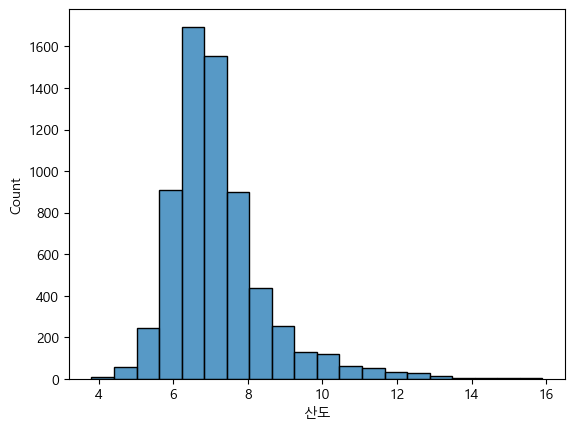

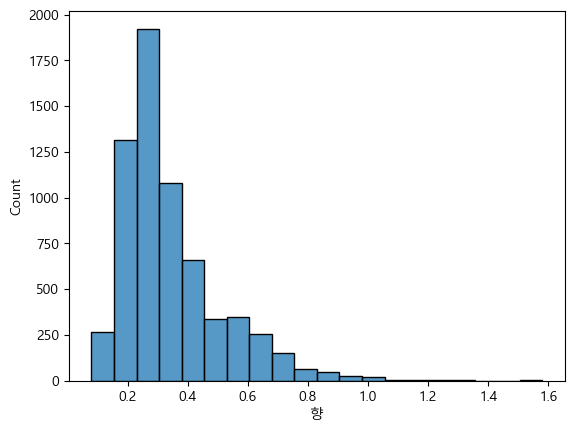

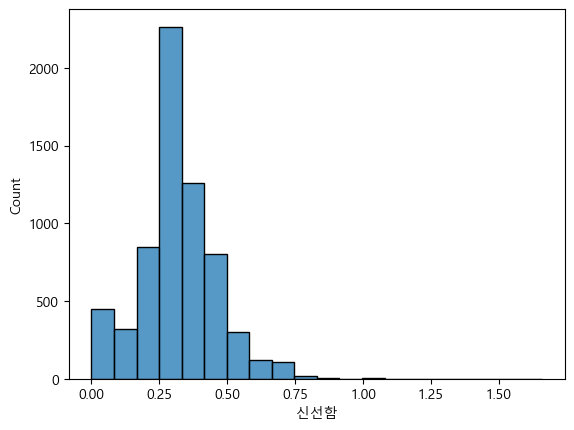

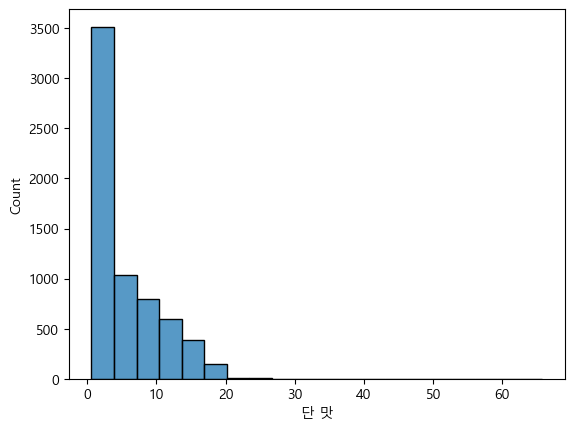

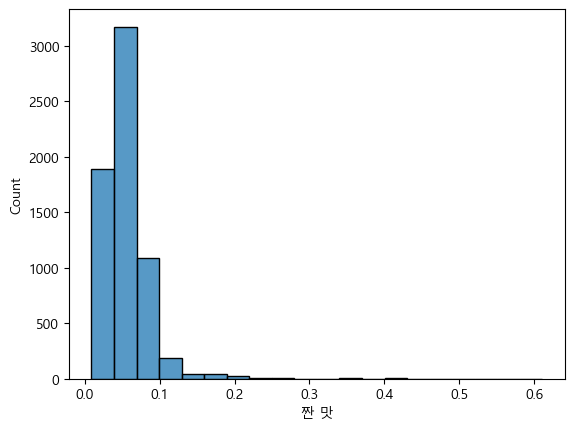

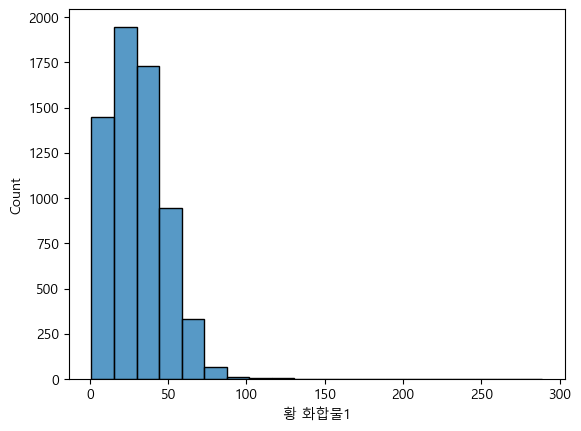

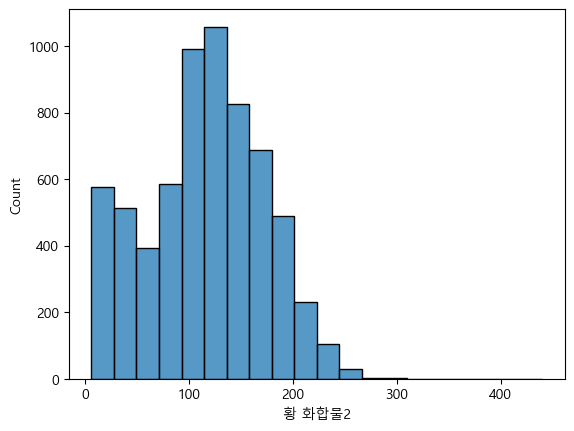

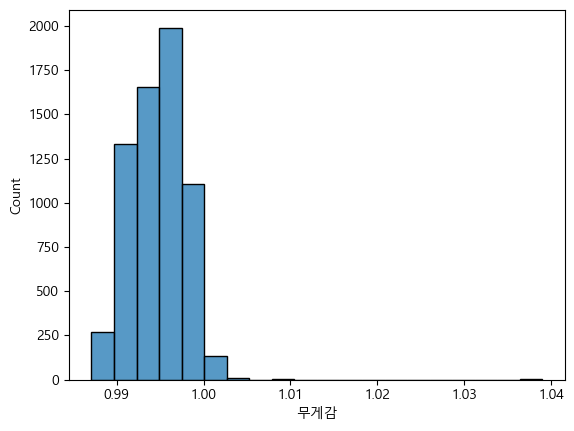

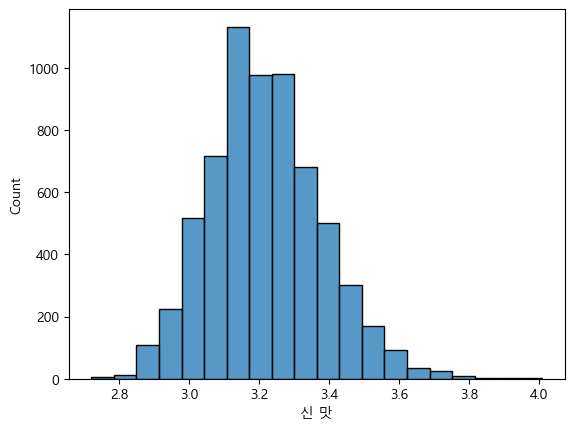

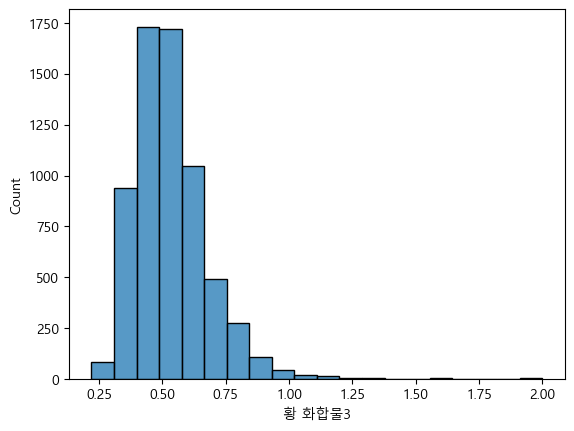

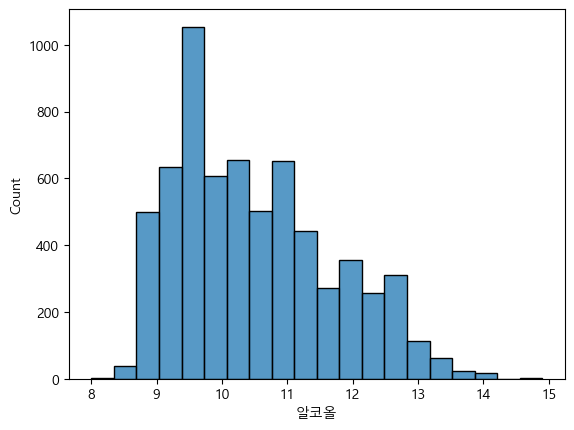

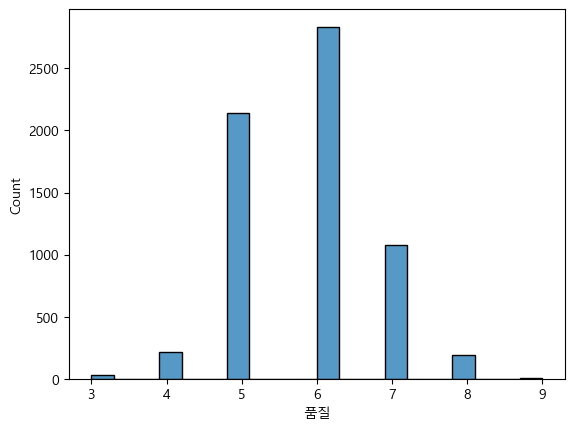

In [13]:
# code here
import seaborn as sns

for f in wine.columns[:-1]:
    sns.histplot(wine, x=f, hue=None, stat='count', bins=20)
    plt.show()

In [ ]:
for f in wine.columns[:-1]:
    sns.histplot(wine, x=f, hue=None, stat='count', bins=20)
    plt.show()

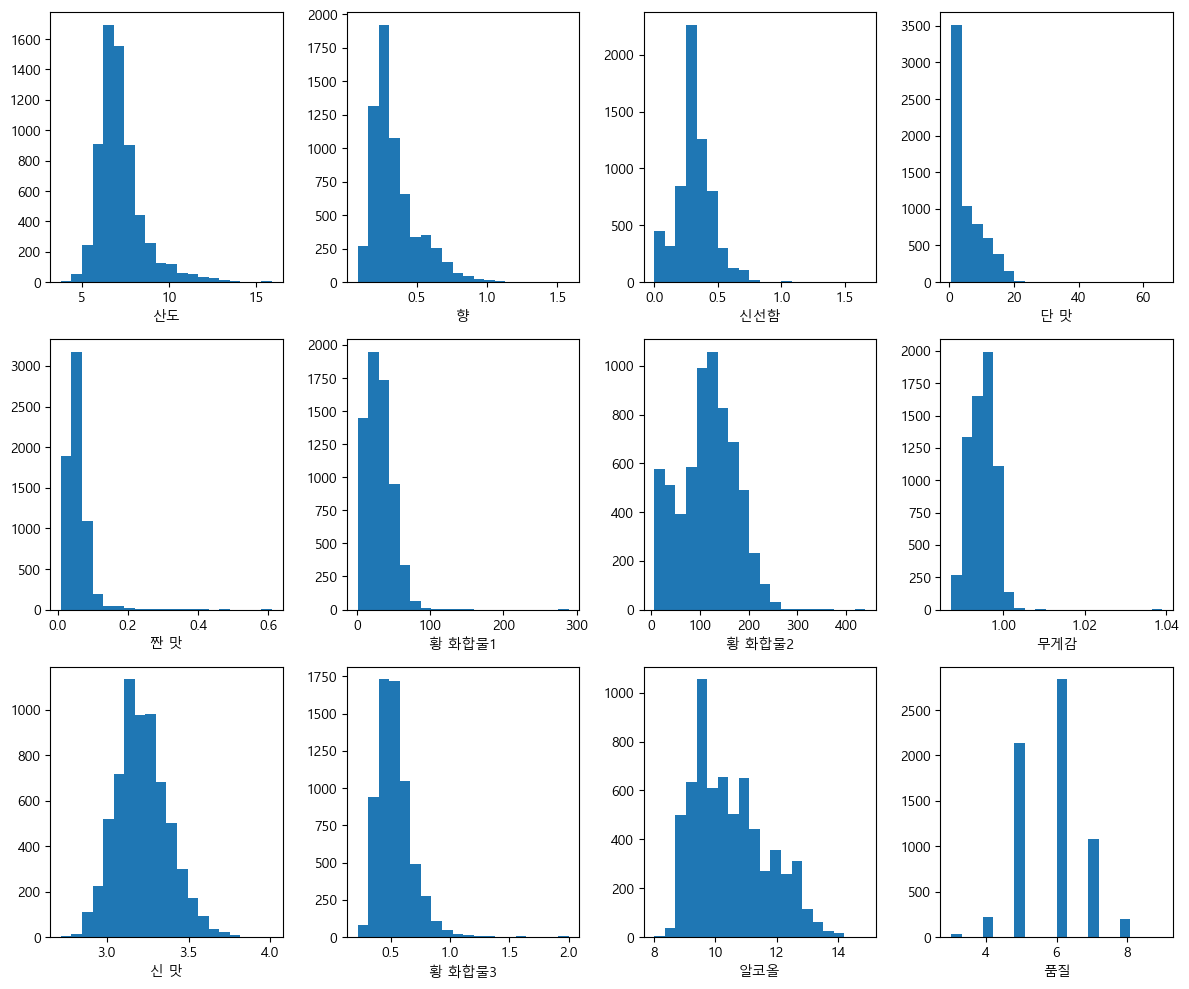

In [22]:
# subplot
plt.figure(figsize=(12,10))
for i, f in enumerate(wine.columns[:-1], start=1):
    plt.subplot(3,4,i)
    plt.hist(wine[f], bins=20)
    plt.xlabel(f)
plt.tight_layout()
plt.show()

 - 유형을 제외한 나머지 변수의 이상치 및 스케일 차이 확인
 - df.plot.box() 사용
 - figsize, rot 조정

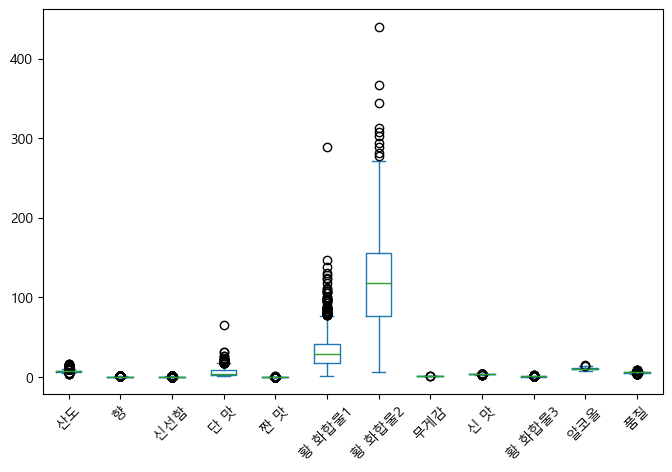

In [23]:
# code here
wine.plot.box(figsize=(8,5), rot=45)
plt.show()

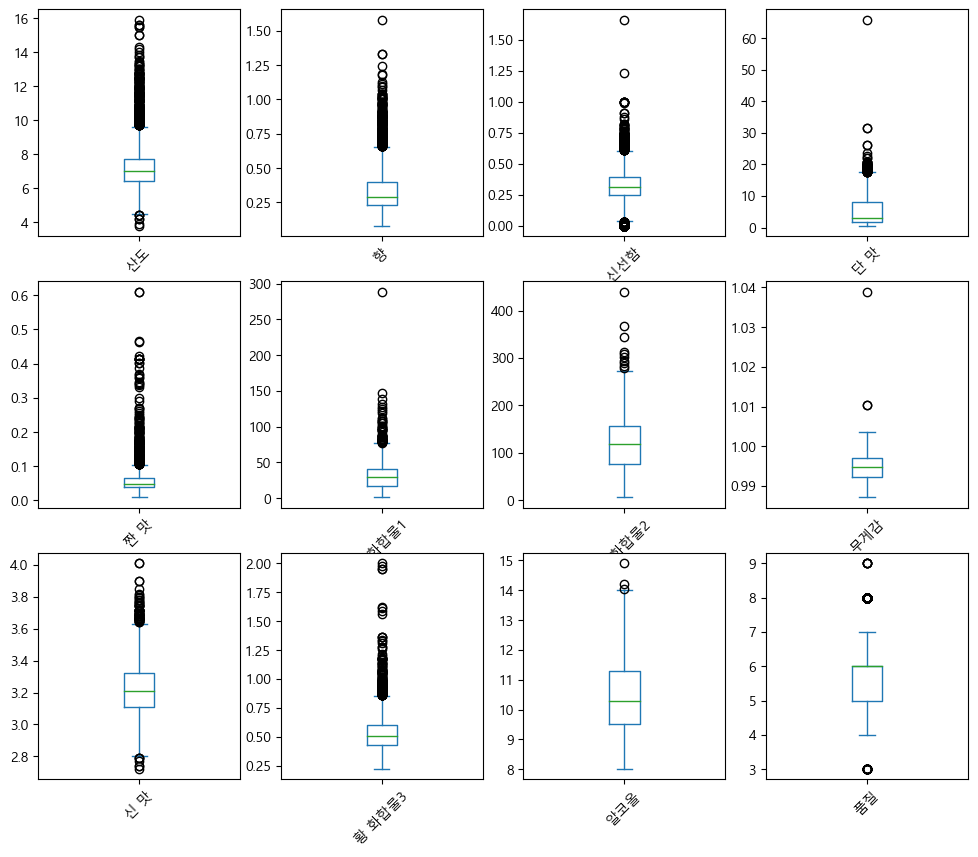

In [27]:
wine.plot.box(figsize=(12,10), rot=45, subplots=True, layout=(3,4))
plt.show()

In [38]:
wine

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질,유형
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


 - 독립 변수 간 상관 계수를 소수점 셋째자리까지 출력

In [39]:
# code here
wine.iloc[:,:-1].corr().round(3)
wine.corr(numeric_only=True).round(3) #이것도 동일한 결과

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질
산도,1.000,0.219,0.324,-0.112,0.298,-0.283,-0.329,0.459,-0.253,0.300,-0.095,-0.077
향,0.219,1.000,-0.378,-0.196,0.377,-0.353,-0.414,0.271,0.261,0.226,-0.038,-0.266
신선함,0.324,-0.378,1.000,0.142,0.039,0.133,0.195,0.096,-0.330,0.056,-0.010,0.086
단 맛,-0.112,-0.196,0.142,1.000,-0.129,0.403,0.495,0.553,-0.267,-0.186,-0.359,-0.037
짠 맛,0.298,0.377,0.039,-0.129,1.000,-0.195,-0.280,0.363,0.045,0.396,-0.257,-0.201
황 화합물1,-0.283,-0.353,0.133,0.403,-0.195,1.000,0.721,0.026,-0.146,-0.188,-0.180,0.055
황 화합물2,-0.329,-0.414,0.195,0.495,-0.280,0.721,1.000,0.032,-0.238,-0.276,-0.266,-0.041
무게감,0.459,0.271,0.096,0.553,0.363,0.026,0.032,1.000,0.012,0.259,-0.687,-0.306
신 맛,-0.253,0.261,-0.330,-0.267,0.045,-0.146,-0.238,0.012,1.000,0.192,0.121,0.020
황 화합물3,0.300,0.226,0.056,-0.186,0.396,-0.188,-0.276,0.259,0.192,1.000,-0.003,0.038


- 독립 변수가 상관계수의 절댓값이 작을수록 좋다.
- 만일, 독립 변수 간 상관관계의 절댓값이 1에 가까우면 '다중공선성' 발생으로 결과의 분산이 커질 수 있다.
- 확인 결과, 1에 가까운 것이 없으므로 그대로 사용한다.
- 만약 1에 가까운 것이 있었다면 변수 중 일부를 학습에 사용하지 않거나, PCA(주성분 분석) 기법을 사용하여 변수를 줄인다.
- ex) 키, 몸무게 → BMI 로 바꿔서 키, 몸무게를 모두 활용하는 식으로

 - 모든 수치 열의 유형 별 평균을 bar 차트로 시각화
 - sns.barplot() 사용
 - 반복문을 사용하여 각 열별 bar 차트 그리기

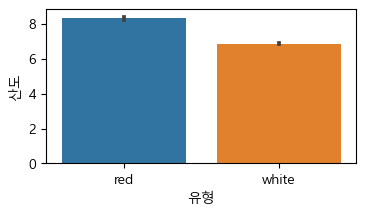

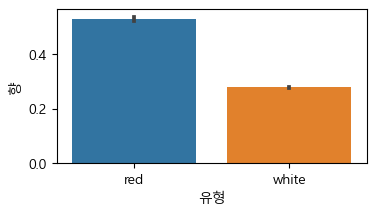

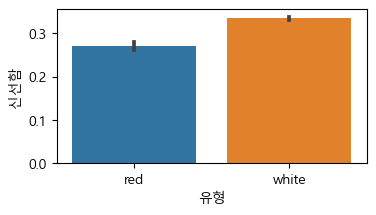

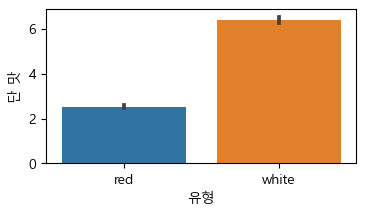

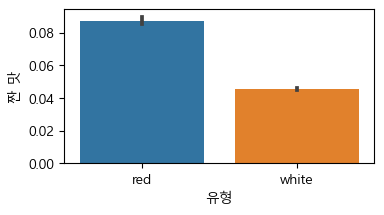

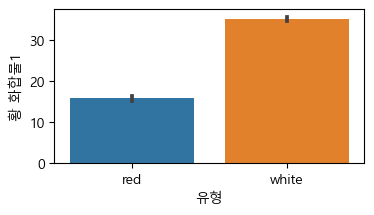

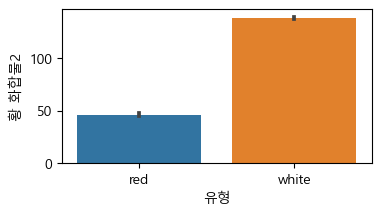

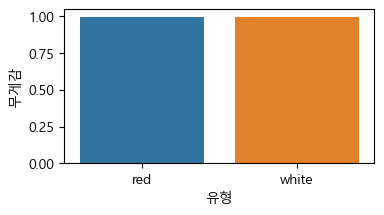

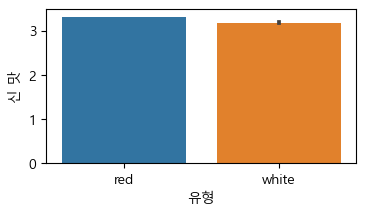

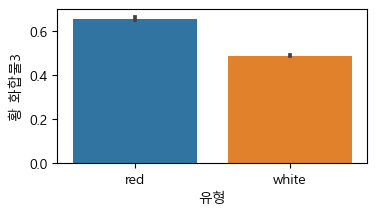

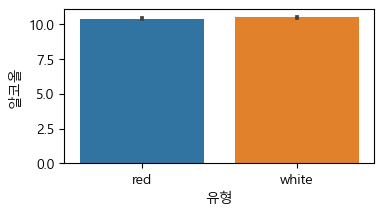

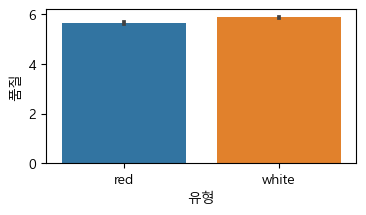

In [41]:
# code here
for f in wine.columns[:-1]:
    plt.figure(figsize=(4,2))
    sns.barplot(data=wine, x='유형', y=f, estimator='mean')
    plt.show()

### 데이터 재확인
 - wine의 정보를 출력하세요.
 - wine의 열 별 결측치를 확인하세요.
 - wine의 열 별 유니크 수를 확인하세요. 

In [70]:
# code here
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   산도      6497 non-null   float64
 1   향       6497 non-null   float64
 2   신선함     6497 non-null   float64
 3   단 맛     6497 non-null   float64
 4   짠 맛     6497 non-null   float64
 5   황 화합물1  6497 non-null   float64
 6   황 화합물2  6497 non-null   float64
 7   무게감     6497 non-null   float64
 8   신 맛     6497 non-null   float64
 9   황 화합물3  6497 non-null   float64
 10  알코올     6497 non-null   float64
 11  품질      6497 non-null   int64  
 12  유형      6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [71]:
# code here
wine.isna().sum()

산도        0
향         0
신선함       0
단 맛       0
짠 맛       0
황 화합물1    0
황 화합물2    0
무게감       0
신 맛       0
황 화합물3    0
알코올       0
품질        0
유형        0
dtype: int64

- Data의 가짓수가 1개이거나, 분산이 0이면 독립변수로써 의미가 없으므로 유니크 수 확인
- 만약 1이 나오는 컬럼이 있으면 제거해야 함

In [72]:
# code here
wine.nunique()

산도        106
향         187
신선함        89
단 맛       316
짠 맛       214
황 화합물1    135
황 화합물2    276
무게감       998
신 맛       108
황 화합물3    111
알코올       111
품질          7
유형          2
dtype: int64

### 학습 데이터 준비
 - wine을 X와 Y로 분리하세요.
   - X: '유형'을 제외한 모든 열
   - Y: '유형

In [42]:
# code here
X = wine.iloc[:,:-1]
X = wine.loc[:,wine.columns != '유형']  #이렇게 명시적으로도 적을 수 있음
X

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [44]:
# code here
Y = wine.iloc[:,-1]
Y

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: 유형, Length: 6497, dtype: object

### 데이터 분할
 - dateset을 trainset과 testset으로 분할하세요.
 - 분할 비율은 train 75 : test 25입니다.
 - random_state = 0

In [50]:
# code here
from sklearn.model_selection import train_test_split

A = x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state= 0, test_size=0.25)
x_train, x_test, y_train, y_test = A
[x.shape for x in [x_train, x_test, y_train, y_test]]

[(4872, 12), (1625, 12), (4872,), (1625,)]

### KNN 모델을 이용한 모델링
 - n_neighbors는 5로 설정하세요.
 - 결과는 정확도로 trainset과 testset 모두 출력하세요.
     - 결괏값은 일치하지 않아도 됩니다.
 

In [51]:
# code here
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9568965517241379, 0.9501538461538461)